C:\Users\ng_mi\AppData\Local\Temp\ipykernel_23648\3412302486.py:8: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date = pd.to_datetime(df['Date'])  # Convert to datetime


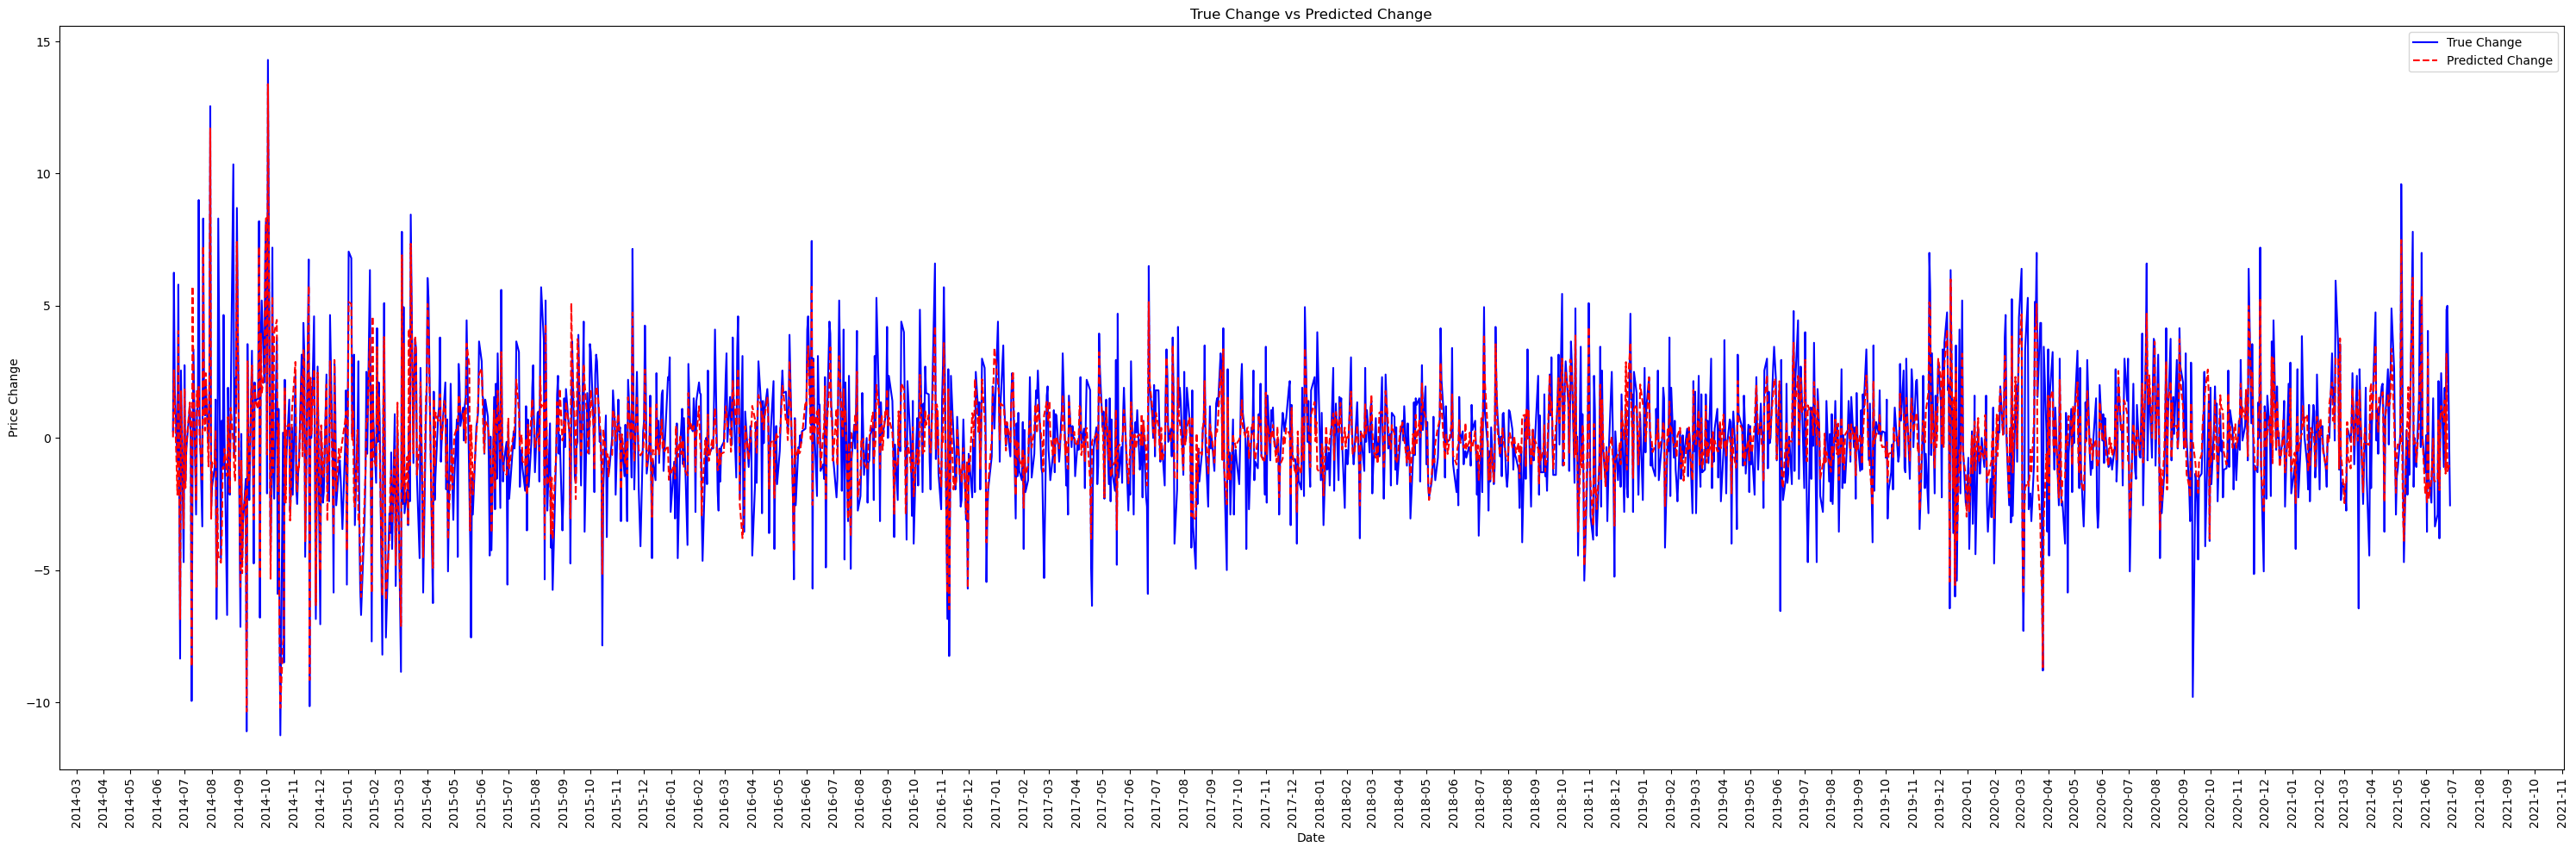

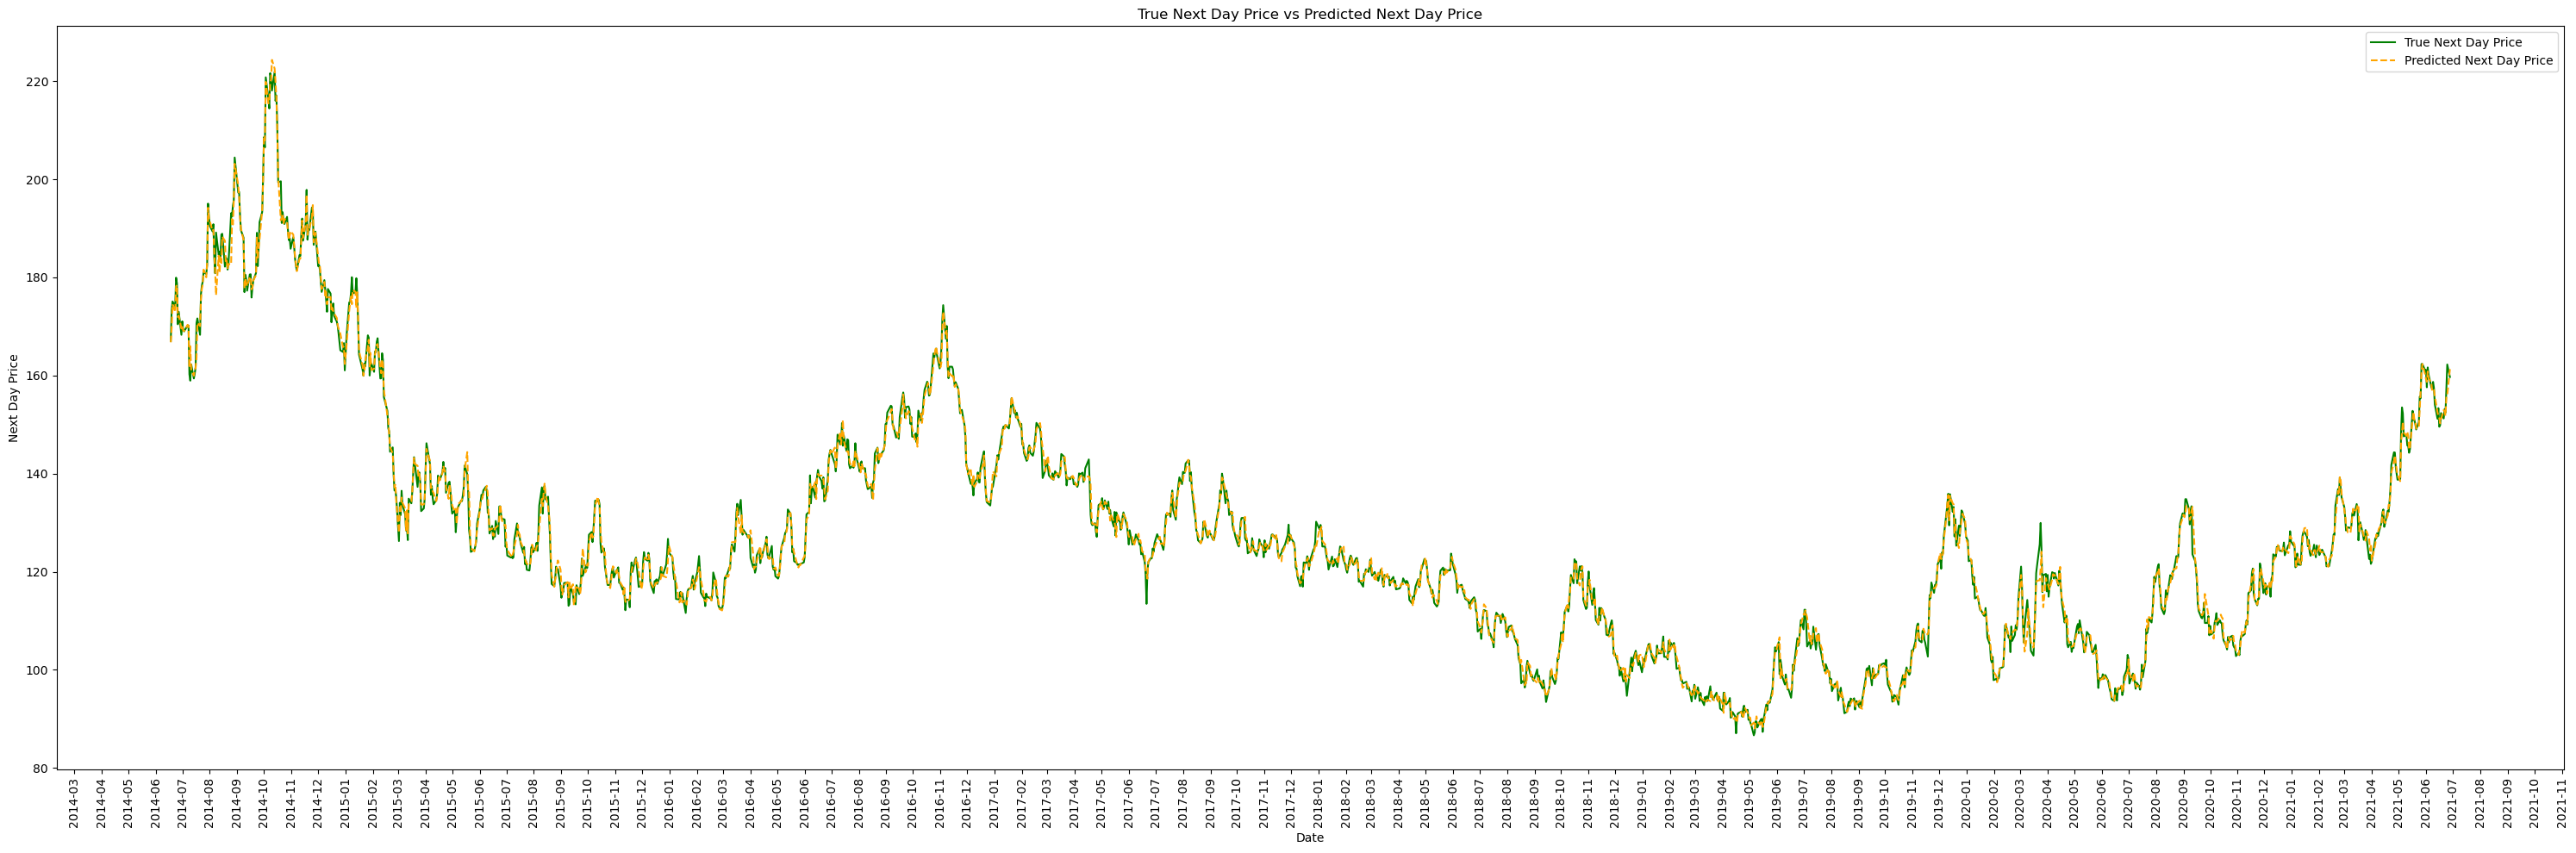

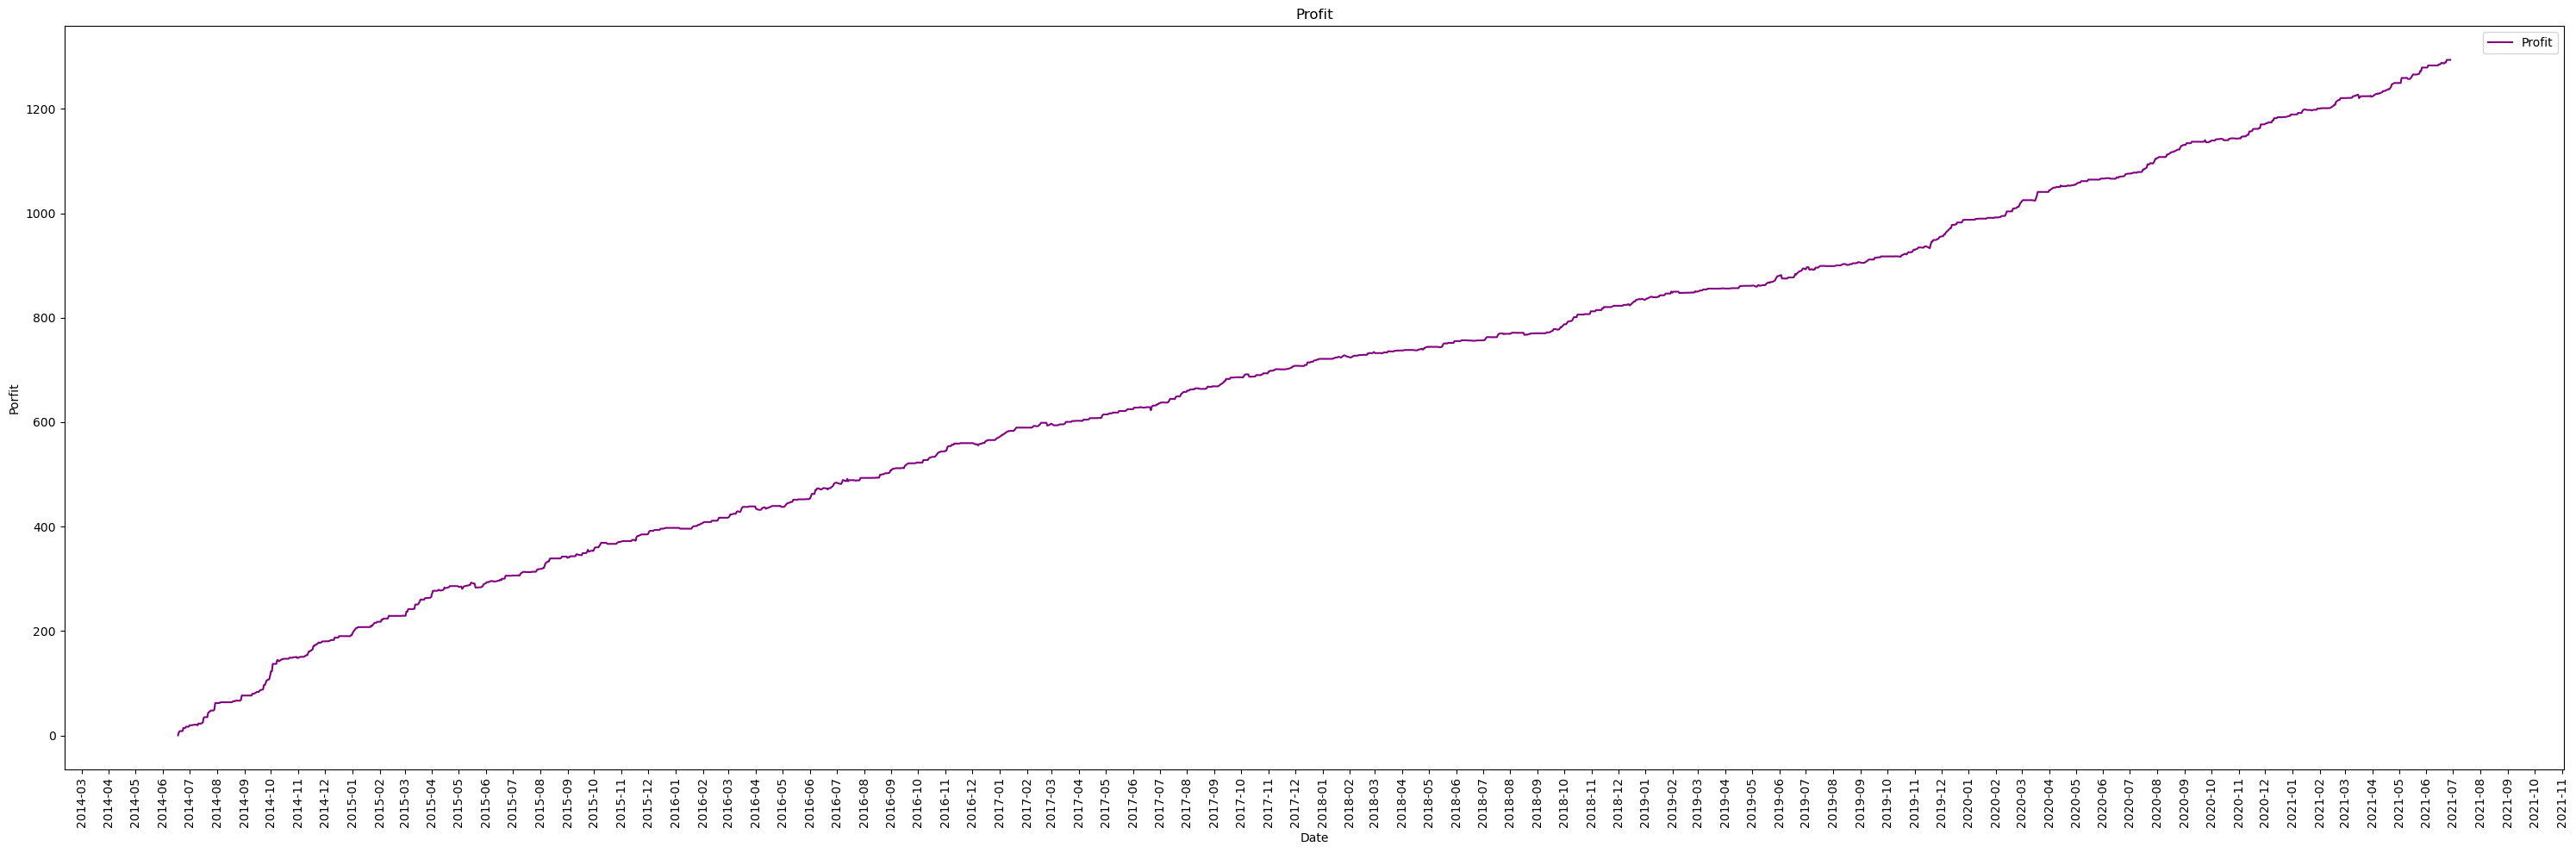

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

df = pd.read_csv('../result/ensemble_and_hybrid/ticker/coffee.csv')

date = pd.to_datetime(df['Date'])  # Convert to datetime

true_change = df['DAILY_CLOSEPRICE_CHANGE']
predicted_change = df["GBT_4_Predicted_Close_Price_Change"]

true_next_day = df['Close'] + df['DAILY_CLOSEPRICE_CHANGE']
predicted_next_day = df['Close'] + df["GBT_4_Predicted_Close_Price_Change"]

# Calculate profit based on conditions
df['Profit'] = np.where(
    (true_change > 0) & (predicted_change > 0), 
    true_change,  
    np.where(
        (true_change < 0) & (predicted_change > 0), 
        true_change,
        0
    )
)

# Create a column for accumulated profit
df['Accumulated_Profit'] = df['Profit'].cumsum()  # Running sum starting at 0

profit = df['Accumulated_Profit']

# Create the first plot: true_change vs predicted_change
plt.figure(figsize=(30, 10))
plt.plot(date, true_change, label='True Change', color='blue')
plt.plot(date, predicted_change, label='Predicted Change', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('True Change vs Predicted Change')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month
plt.tight_layout()
plt.savefig('../result/true_vs_predicted_change.png', dpi=300)  # Save the first plot
#plt.close()  # Close the figure to free memory

# Create the second plot: true_next_day vs predicted_next_day
plt.figure(figsize=(30, 10))
plt.plot(date, true_next_day, label='True Next Day Price', color='green')
plt.plot(date, predicted_next_day, label='Predicted Next Day Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Next Day Price')
plt.title('True Next Day Price vs Predicted Next Day Price')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month
plt.tight_layout()
plt.savefig('../result/true_vs_predicted_next_day_price.png', dpi=300)  # Save the second plot
#plt.close()  # Close the figure to free memory



# Create the second plot: true_next_day vs predicted_next_day
plt.figure(figsize=(30, 10))
plt.plot(date, profit, label='Profit', color='purple')
plt.xlabel('Date')
plt.ylabel('Porfit')
plt.title('Profit')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month
plt.tight_layout()
plt.savefig('../result/profit.png', dpi=300)  # Save the second plot
#plt.close()  # Close the figure to free memory



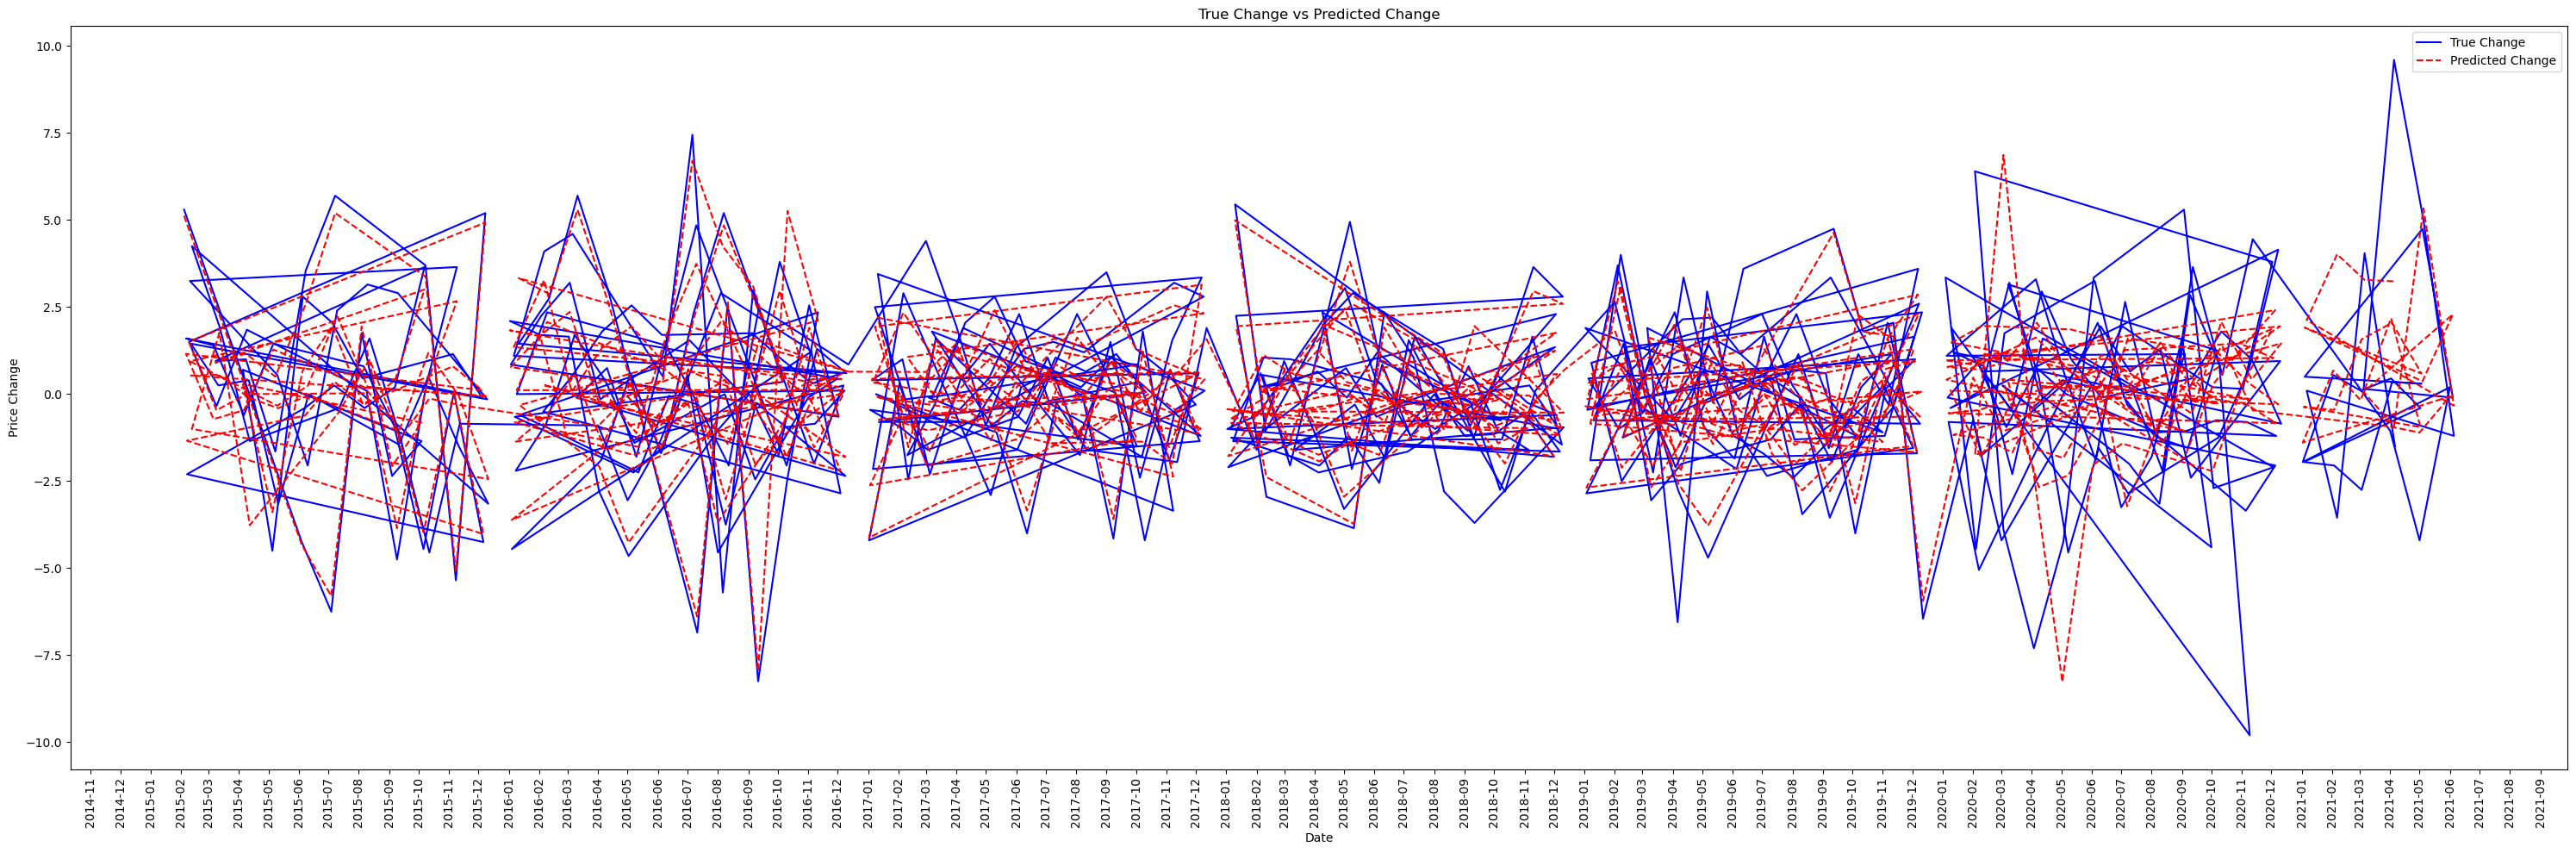

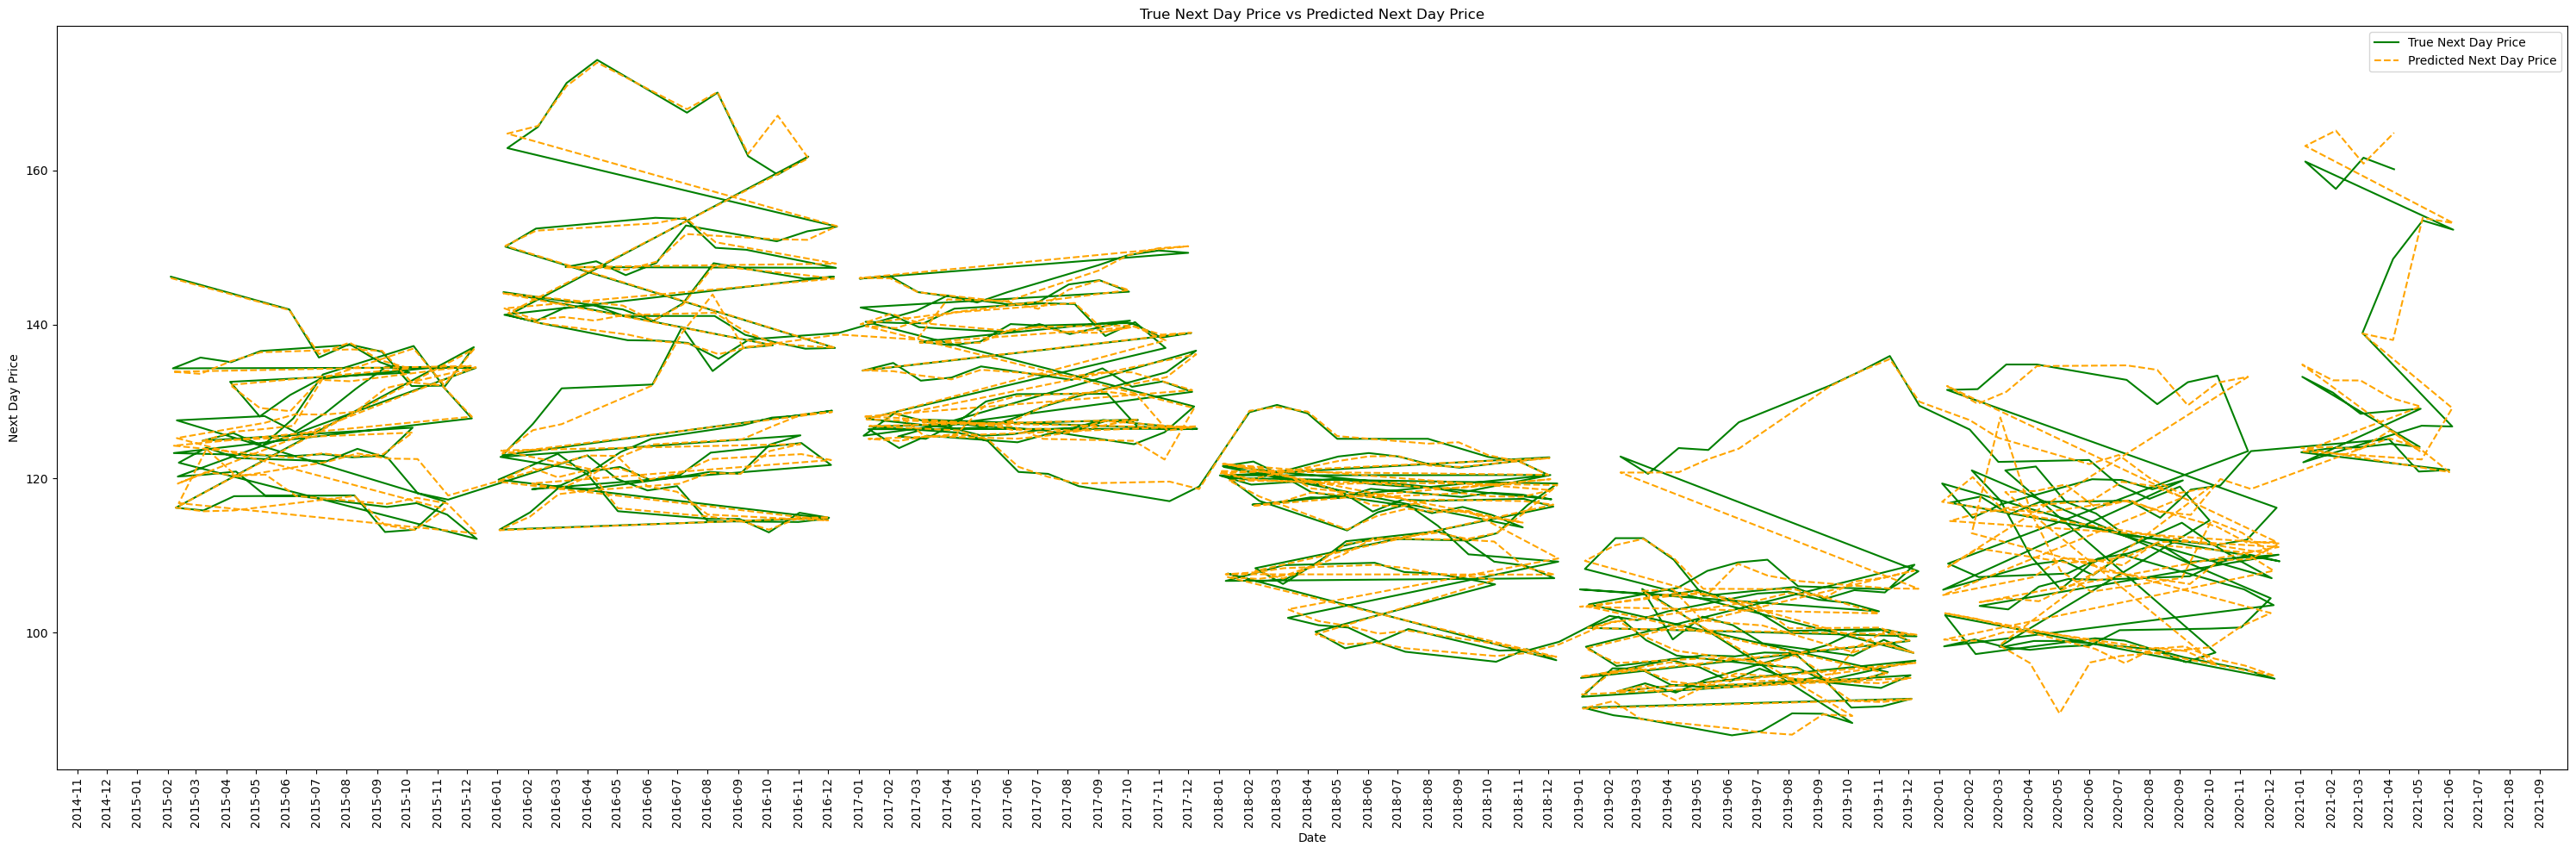

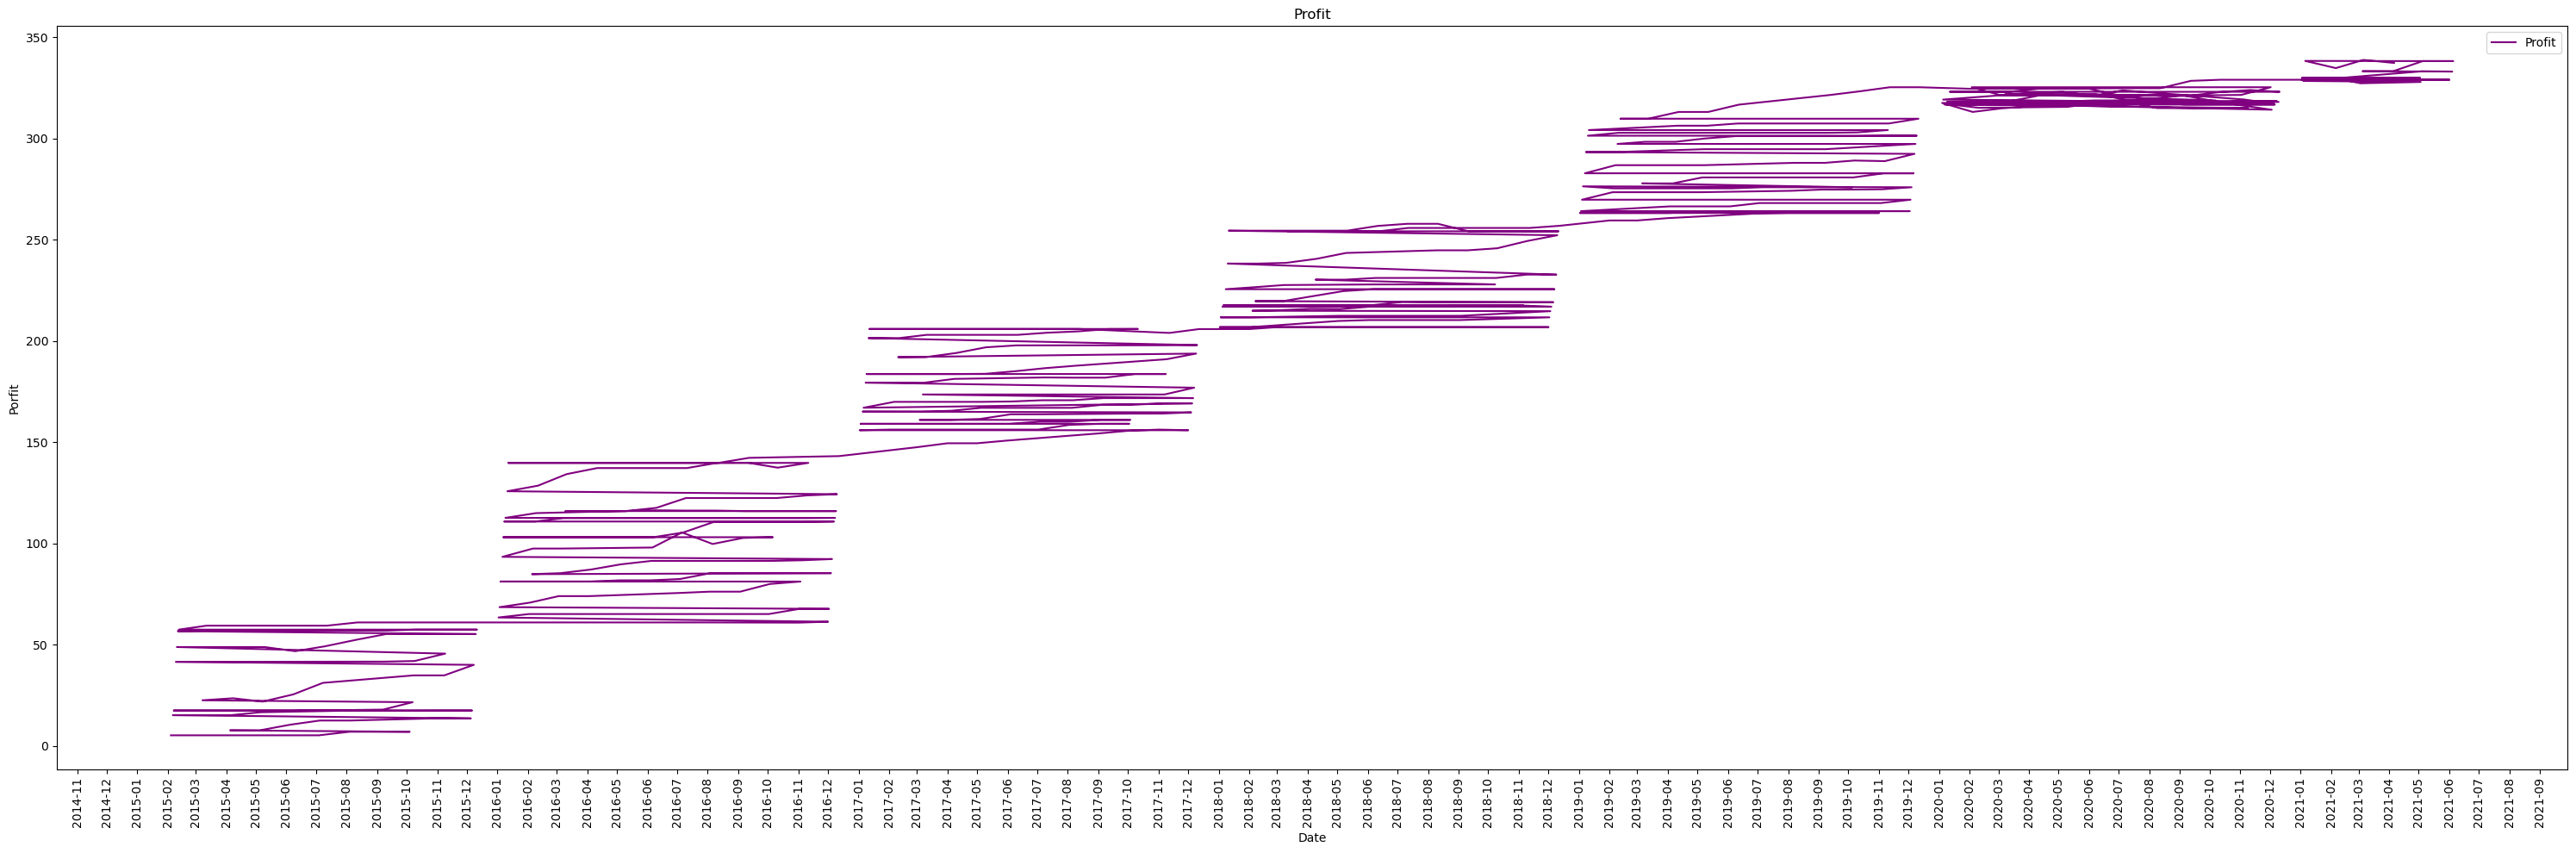

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

df = pd.read_csv('../predicted_output/pca/ticker/coffee.csv')

true_change = df['DAILY_CLOSEPRICE_CHANGE']
predicted_change = df["GBT_2_Predicted_Close_Price_Change"]

'''
cutoff_date = pd.to_datetime("1/1/2020")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df[(df['Date'] >= cutoff_date)]

df.reset_index(drop=True, inplace=True)


# Calculate profit based on conditions
df['Profit'] = np.where(
    (true_change > 0) & (predicted_change > 0), 
    true_change,  
    np.where(
        (true_change < 0) & (predicted_change > 0), 
        true_change,
        0
    )
)

# Create a column for accumulated profit
df['Accumulated_Profit'] = df['Profit'].cumsum()  # Running sum starting at 0


df.to_csv(f'../result/profit.csv', index=False)

df = pd.read_csv('../result/profit.csv')
'''

# Calculate profit based on conditions
df['Profit'] = np.where(
    (true_change > 0) & (predicted_change > 0), 
    true_change,  
    np.where(
        (true_change < 0) & (predicted_change > 0), 
        true_change,
        0
    )
)

# Create a column for accumulated profit
df['Accumulated_Profit'] = df['Profit'].cumsum()  # Running sum starting at 0
df.to_csv(f'../result/profit.csv', index=False)


date = pd.to_datetime(df['Date'])  # Convert to datetime



true_change = df['DAILY_CLOSEPRICE_CHANGE']
predicted_change = df["GBT_2_Predicted_Close_Price_Change"]

true_next_day = df['Close'] + df['DAILY_CLOSEPRICE_CHANGE']
predicted_next_day = df['Close'] + df["GBT_2_Predicted_Close_Price_Change"]

profit = df['Accumulated_Profit']


# Create the first plot: true_change vs predicted_change
plt.figure(figsize=(30, 10))
plt.plot(date, true_change, label='True Change', color='blue')
plt.plot(date, predicted_change, label='Predicted Change', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('True Change vs Predicted Change')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month
plt.tight_layout()
#plt.savefig('../result/true_vs_predicted_change.png', dpi=300)  # Save the first plot
#plt.close()  # Close the figure to free memory

# Create the second plot: true_next_day vs predicted_next_day
plt.figure(figsize=(30, 10))
plt.plot(date, true_next_day, label='True Next Day Price', color='green')
plt.plot(date, predicted_next_day, label='Predicted Next Day Price', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Next Day Price')
plt.title('True Next Day Price vs Predicted Next Day Price')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month
plt.tight_layout()
#plt.savefig('../result/true_vs_predicted_next_day_price.png', dpi=300)  # Save the second plot
#plt.close()  # Close the figure to free memory


# Create the second plot: true_next_day vs predicted_next_day
plt.figure(figsize=(30, 10))
plt.plot(date, profit, label='Profit', color='purple')
plt.xlabel('Date')
plt.ylabel('Porfit')
plt.title('Profit')
plt.legend()
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set major ticks to monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format ticks as Year-Month
plt.tight_layout()
#plt.savefig('../result/profit.png', dpi=300)  # Save the second plot
#plt.close()  # Close the figure to free memory
